<a href="https://colab.research.google.com/github/AlvinAditiya117/PCVK25_3F_04/blob/main/Week5_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alvin Aditiya 3F 04 2341720020

#**PERCOBAAN PRAKTIKUM**

**D-1 PERCOBAAN HISTOGRAM**

In [2]:
#import folder yang ada di Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import beberapa library

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

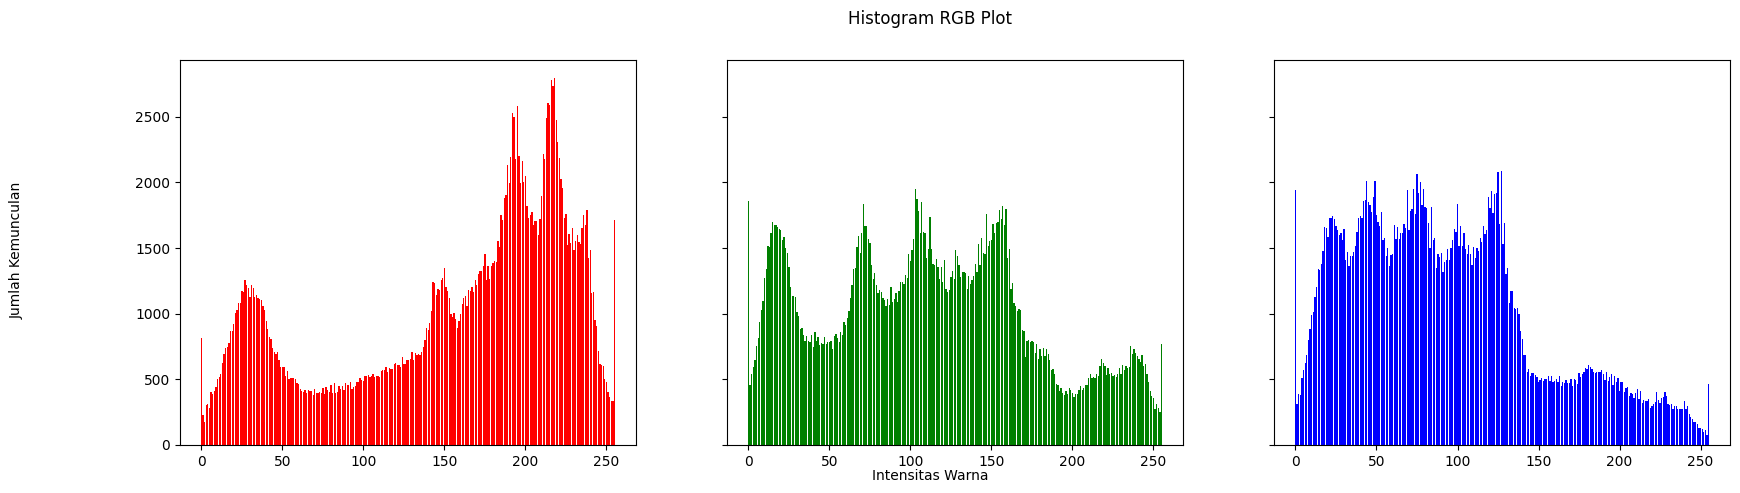

In [4]:
#Membuat Histogram Image (manual)

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
    for x in range(0,width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**PERTANYAAN PRAKTIKUM D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

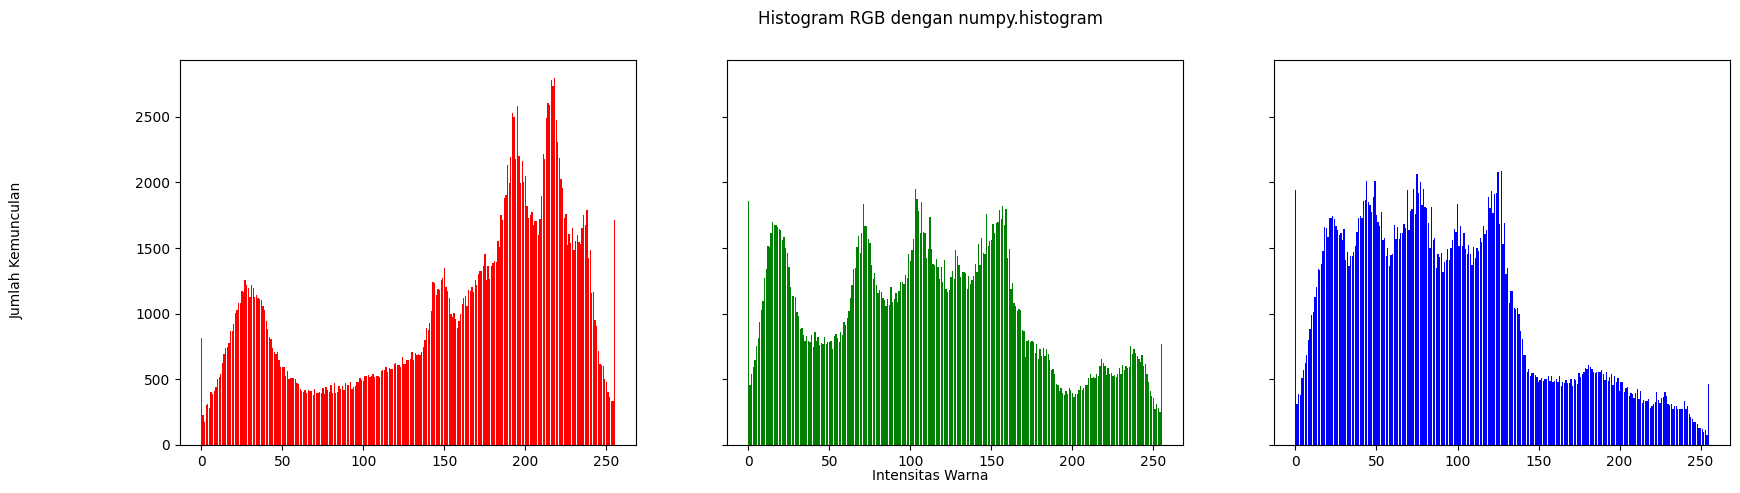

In [5]:

# 1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang
# dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

# Hitung histogram menggunakan numpy.histogram
hist_r, bins_r = np.histogram(r, bins=256, range=(0,256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0,256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0,256))

# Plot hasil
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan numpy.histogram')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(range(256), hist_r, color='red')
axs[1].bar(range(256), hist_g, color='green')
axs[2].bar(range(256), hist_b, color='blue')

plt.show()


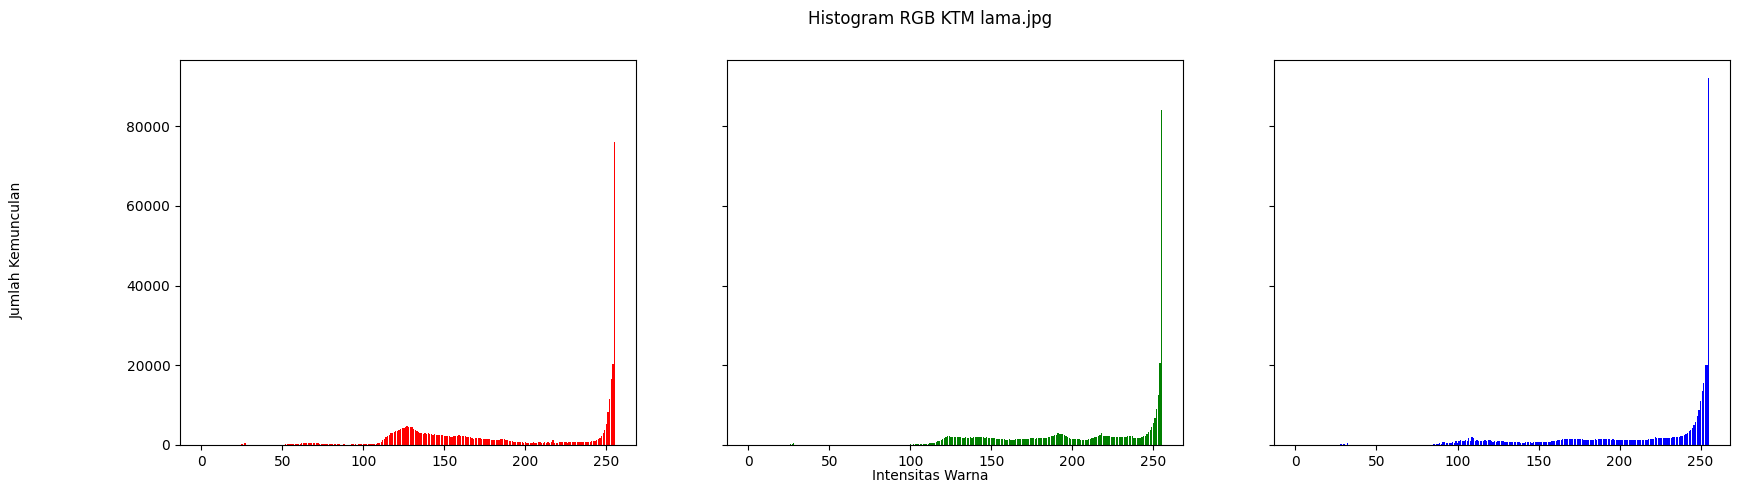

In [6]:
# 2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg. Analisis distribusi
# intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.


img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/KTM lama.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

r2, g2, b2 = cv.split(img2)

# Hitung histogram
hist_r2, _ = np.histogram(r2, bins=256, range=(0,256))
hist_g2, _ = np.histogram(g2, bins=256, range=(0,256))
hist_b2, _ = np.histogram(b2, bins=256, range=(0,256))

# Plot
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB KTM lama.jpg')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(range(256), hist_r2, color='red')
axs[1].bar(range(256), hist_g2, color='green')
axs[2].bar(range(256), hist_b2, color='blue')

plt.show()


pada histogram awal menunjukan intensitas warna yang rendah (gelap) kemudian intensitas mulai sedikit menaik dan pada akhir histogram naik sangat tinggi dengan frekuensi 80000,, yang brarti gambar KTM lama cenderung terang dengan kontras yang tinggi.

#**D-2 PERCOBAAN HISTOGRAM EQUALIZATION**

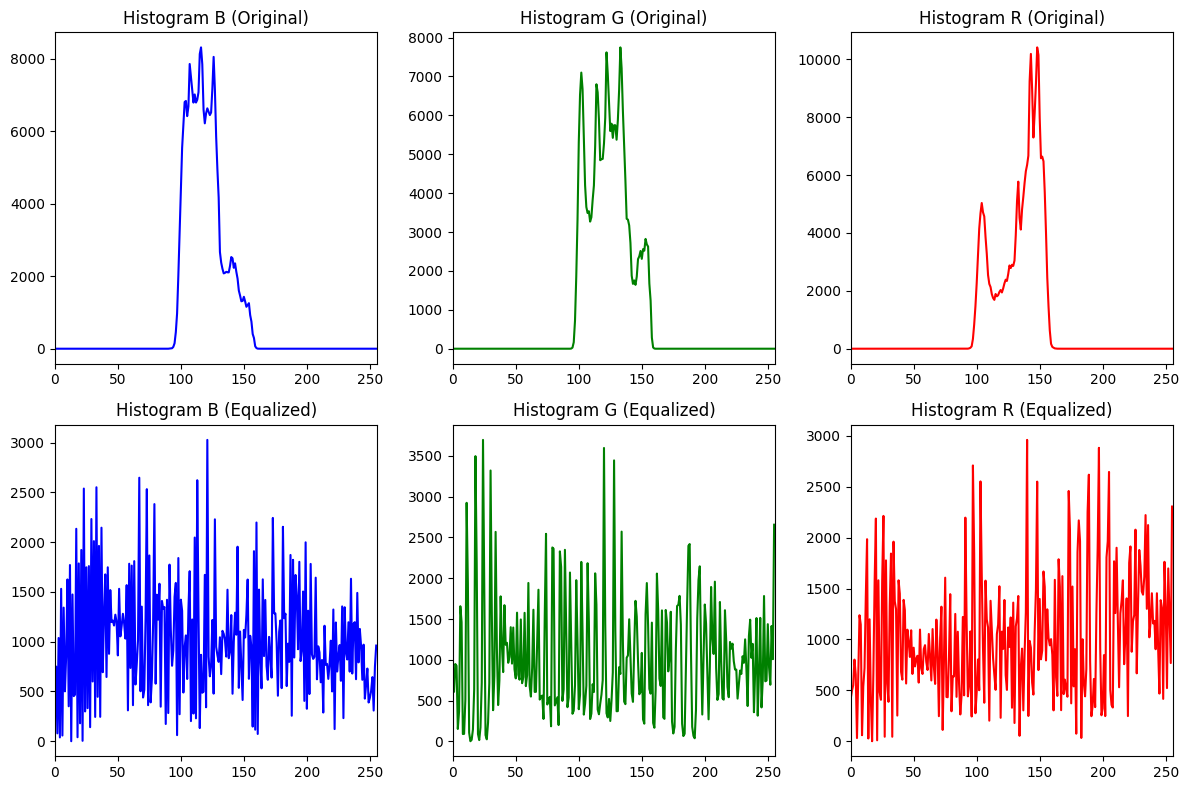

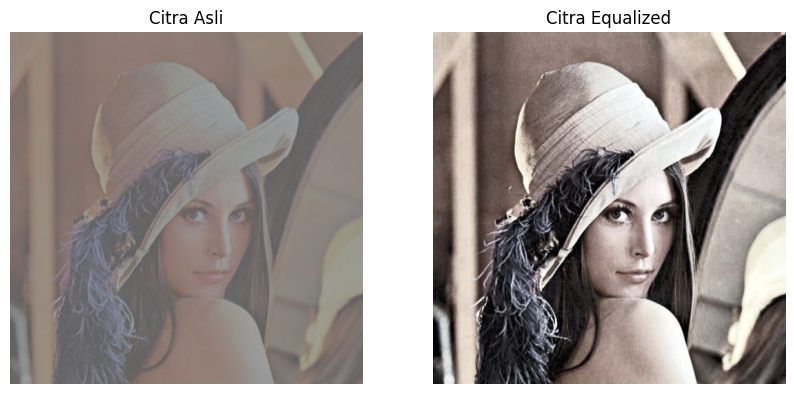

In [9]:
#Buatlah histogram citra seperti output histogram equalization dan juga tampilan
#gambar sebelum dan sesudah proses histogram equalization

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena_lc.jpg')

# Ubah ke YCrCb (biar equalization hanya ke luminance, bukan ke warna)
ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)

# Pisahkan channel
y, cr, cb = cv.split(ycrcb)

# Histogram Equalization hanya pada channel Y
y_eq = cv.equalizeHist(y)

# Gabungkan kembali
ycrcb_eq = cv.merge((y_eq, cr, cb))
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2BGR)

# Buat histogram RGB sebelum dan sesudah
colors = ('b','g','r')
plt.figure(figsize=(12,8))

for i,col in enumerate(colors):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,3,i+1)
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    plt.title(f'Histogram {col.upper()} (Original)')

    histr_eq = cv.calcHist([img_eq],[i],None,[256],[0,256])
    plt.subplot(2,3,i+4)
    plt.plot(histr_eq,color=col)
    plt.xlim([0,256])
    plt.title(f'Histogram {col.upper()} (Equalized)')

plt.tight_layout()

# Tampilkan gambar sebelum dan sesudah
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title("Citra Equalized")
plt.axis("off")

plt.show()


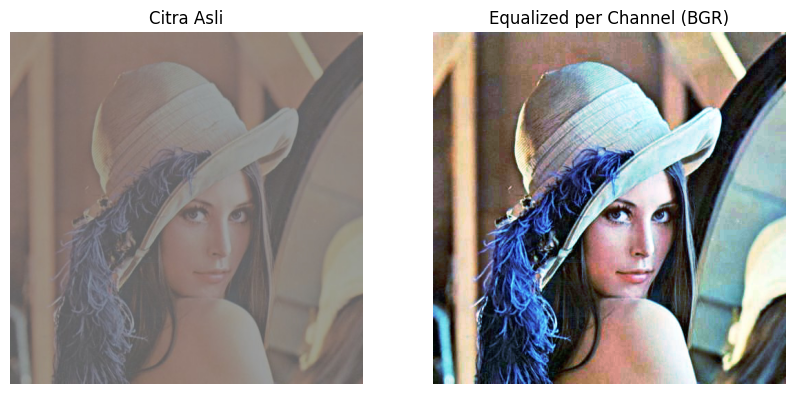

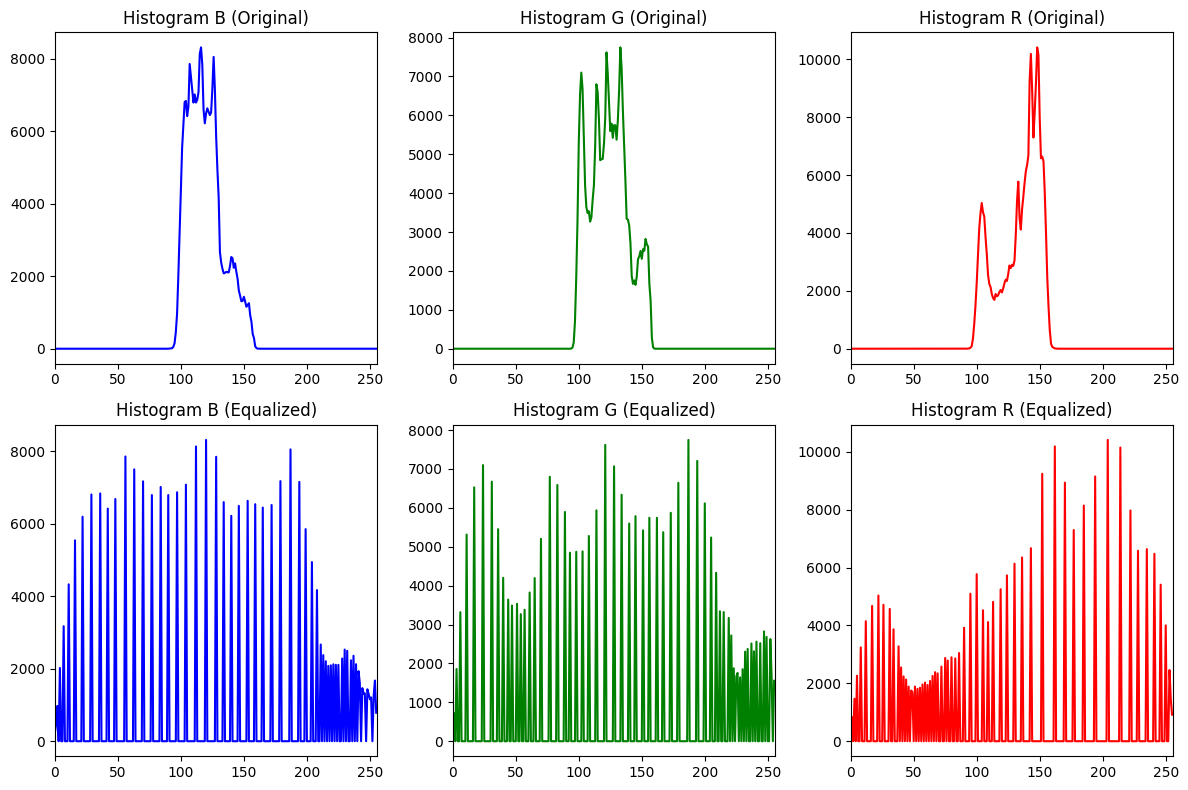

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena_lc.jpg')

# Pisahkan channel BGR
b, g, r = cv.split(img)

# Equalize setiap channel
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Gabungkan kembali
img_eq_bgr = cv.merge((b_eq, g_eq, r_eq))

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq_bgr, cv.COLOR_BGR2RGB))
plt.title("Equalized per Channel (BGR)")
plt.axis("off")
plt.show()

# Plot histogram sebelum & sesudah
colors = ('b','g','r')
plt.figure(figsize=(12,8))
for i,col in enumerate(colors):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,3,i+1)
    plt.plot(histr,color=col)
    plt.title(f'Histogram {col.upper()} (Original)')
    plt.xlim([0,256])

    histr_eq = cv.calcHist([img_eq_bgr],[i],None,[256],[0,256])
    plt.subplot(2,3,i+4)
    plt.plot(histr_eq,color=col)
    plt.title(f'Histogram {col.upper()} (Equalized)')
    plt.xlim([0,256])

plt.tight_layout()
plt.show()


**PERTANYAAN PRAKTIKUM D2**

1. Perbandingan Citra Lena

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

Nilai PSNR antara citra asli dan hasil equalization: 27.14098781695606 dB


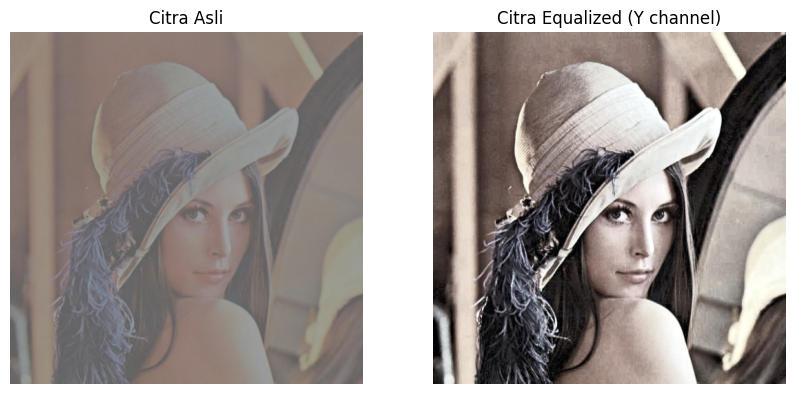

In [13]:


# Fungsi PSNR
def psnr(original, compared):
    mse = np.mean((original - compared) ** 2)
    if mse == 0:
        return float('inf')   # Jika identik
    PIXEL_MAX = 255.0
    return 10 * np.log10((PIXEL_MAX ** 2) / mse)

# Baca gambar asli
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/lena_lc.jpg')

# ==== Histogram Equalization di channel Y ====
ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)
y_eq = cv.equalizeHist(y)
ycrcb_eq = cv.merge((y_eq, cr, cb))
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2BGR)

# Hitung nilai PSNR
nilai_psnr = psnr(img, img_eq)
print("Nilai PSNR antara citra asli dan hasil equalization:", nilai_psnr, "dB")

# ==== Visualisasi perbandingan ====
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title("Citra Equalized (Y channel)")
plt.axis("off")
plt.show()


1.B PSNR sedang (20–30 dB) → perbedaan terlihat, tapi citra masih bagus.

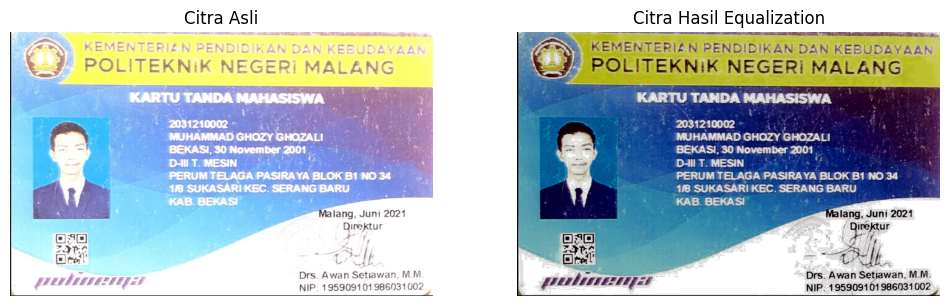

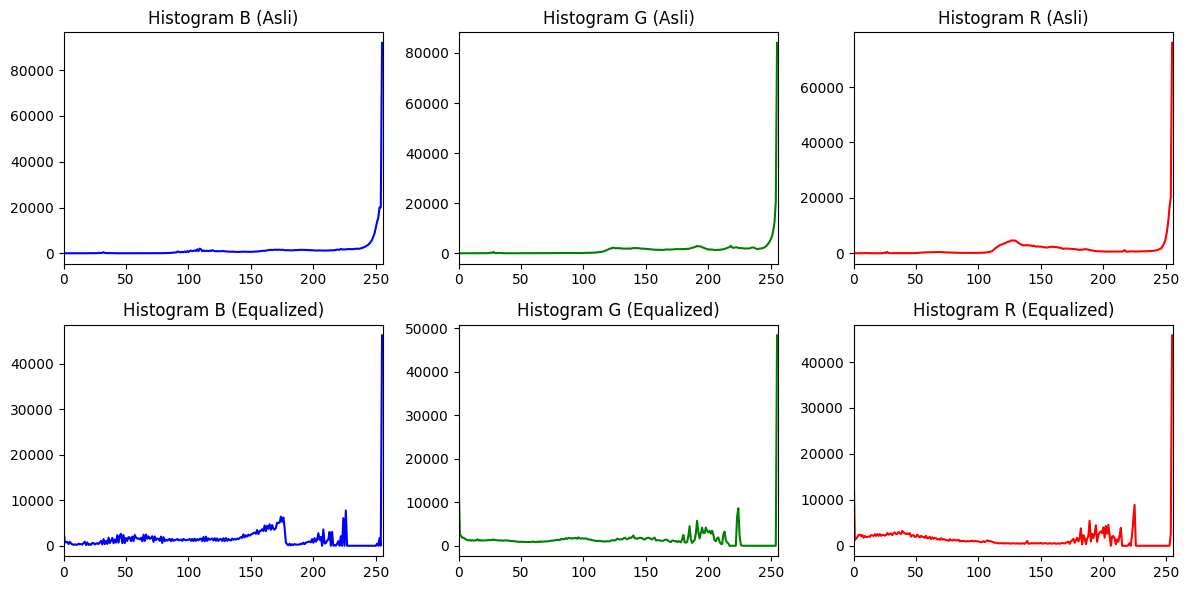

In [14]:
#2. B

# Baca citra
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/KTM lama.jpg')

# Ubah ke YCrCb
ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

# Histogram equalization hanya pada channel Y
y_eq = cv.equalizeHist(y)

# Gabungkan lagi
ycrcb_eq = cv.merge((y_eq, cr, cb))
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2BGR)

# ==== Visualisasi citra ====
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title("Citra Hasil Equalization")
plt.axis("off")
plt.show()

# ==== Histogram ====
colors = ('b','g','r')
plt.figure(figsize=(12,6))
for i,col in enumerate(colors):
    # Histogram citra asli
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,3,i+1)
    plt.plot(histr,color=col)
    plt.title(f'Histogram {col.upper()} (Asli)')
    plt.xlim([0,256])

    # Histogram citra equalized
    histr_eq = cv.calcHist([img_eq],[i],None,[256],[0,256])
    plt.subplot(2,3,i+4)
    plt.plot(histr_eq,color=col)
    plt.title(f'Histogram {col.upper()} (Equalized)')
    plt.xlim([0,256])

plt.tight_layout()
plt.show()


#2C

Histogram equalization pada KTM Lama.jpg berhasil meningkatkan kontras dan menampilkan lebih banyak detail, khususnya pada teks, wajah, dan latar belakang.
Visual citra memang jadi sedikit “keras” dibandingkan aslinya, tapi secara informasi lebih bermanfaat karena teks lebih mudah dibaca dan detail yang tadinya samar menjadi terlihat.
Jadi, meskipun PSNR (kualitas per-piksel) mungkin menurun, kualitas informasi citra meningkat.

#**D-3 TUGAS PRAKTIKUM DITHERING**